In [ ]:
import pandas as pd
import numpy as np
import keras
import glob
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from mlxtend.preprocessing import minmax_scaling
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Input, BatchNormalization, Multiply, Activation

from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras import backend as K
# import splitfolders

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import os


In [ ]:
import tensorflow as tf

# load json and create model
json_file = open('model_v1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model =  tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='sparse_categorical_cross_entropy', optimizer='Adam', metrics=['accuracy'])

Loaded model from disk


In [ ]:
img_test_path = "/content/drive/MyDrive/test/bread/bread12128.jpg"
img_test_path2 = "/content/drive/MyDrive/test/rice/rice24000.jpg"

In [ ]:
test_img = cv2.imread(img_test_path)
test_img = cv2.resize(test_img,(128,128))
test_img = np.array(test_img)
test_img = test_img/255.0

test_arr = np.array( [test_img])
test_arr.shape

(1, 128, 128, 3)

In [ ]:
np.argmax(loaded_model.predict(test_arr),axis=1)

array([1])

In [ ]:
arr = loaded_model.predict(test_arr)

In [ ]:
arr.sum()

0.9999999

In [ ]:
arr.max()

0.9584064

In [ ]:
test_path="/content/drive/MyDrive/test"

x_test=[]

food = ['bananas','bread','peas','rice','tomatoes']

for folder in food:
    

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        x_test.append(img_arr)

  
test_x=np.array(x_test)
test_x=test_x/255.0
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'sparse')

test_y = test_set.classes

Found 4381 images belonging to 5 classes.


In [ ]:
test_x


In [ ]:
y_pred = loaded_model.predict(test_x)

In [ ]:
final_arr =np.argmax(y_pred,axis=1)

In [ ]:
test_y

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
np.array(final_arr)

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
accuracy_score(test_y,final_arr)

0.9543483223008445

In [ ]:
cm = confusion_matrix(test_y, final_arr)


In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['bananas','bread','peas','rice','tomatoes'], 
                     columns = ['bananas','bread','peas','rice','tomatoes'])

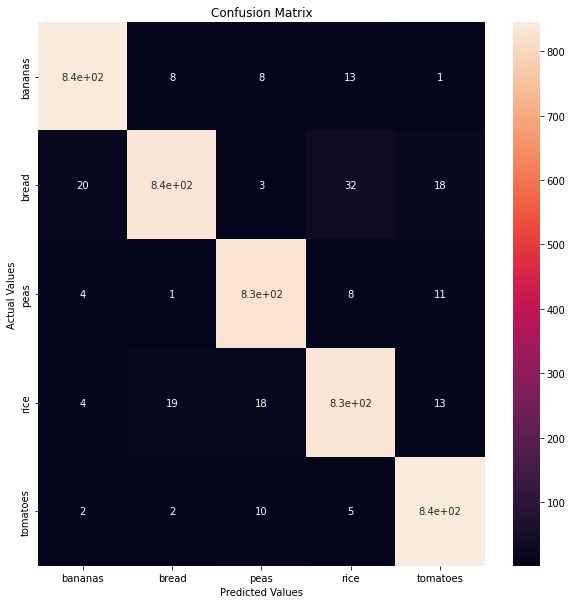

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()